In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv("infolimpioavanzadoTarget.csv")

# 2. Basic shape and first rows
print("Shape (rows, columns):", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# 3. Column names (just to see what's inside)
print("\nColumns:")
print(df.columns.tolist())


Shape (rows, columns): (1497, 1285)

First 5 rows:
         date       open       high        low      close   adjclose  volume  \
0  2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600   
1  2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2  2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3  2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4  2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15  \
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
2   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
3   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
4   ASLE            NaN          NaN  ...      NaN   NaN   NaN   

   stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo 

In [ ]:
# Choose a few important columns
cols_to_describe = [
    'open', 'high', 'low', 'close', 'adjclose',
    'volume', 'diff', 'INCREMENTO', 'TARGET'
]

existing_cols = [c for c in cols_to_describe if c in df.columns]

print("\nSummary statistics:")
print(df[existing_cols].describe())

# Target distribution (class balance)
if 'TARGET' in df.columns:
    print("\nTARGET value counts:")
    print(df['TARGET'].value_counts())

    print("\nTARGET percentage:")
    print(df['TARGET'].value_counts(normalize=True) * 100)



Summary statistics:
              open         high          low        close     adjclose  \
count  1497.000000  1497.000000  1497.000000  1497.000000  1497.000000   
mean    122.200027   124.443499   119.852302   122.167478   121.004652   
std     204.091734   207.284552   200.542561   203.974140   201.381427   
min       1.050000     1.150000     0.820000     1.090000     1.090000   
25%       2.950000     3.025000     2.755000     2.915000     2.915000   
50%      21.200001    21.370001    20.681000    21.180000    21.180000   
75%     107.760002   110.029999   105.205002   107.330002   107.330002   
max     795.739990   799.359985   784.960022   797.489990   783.376221   

             volume         diff   INCREMENTO       TARGET  
count  1.497000e+03  1471.000000  1471.000000  1496.000000  
mean   7.503301e+05    -0.741593     0.810505     0.235963  
std    1.130975e+06    16.477955    13.398322     0.424741  
min    2.120000e+03   -90.538818   -24.673205     0.000000  
25%    

In [ ]:
# Percentage of missing values in each column
missing = df.isna().mean().sort_values(ascending=False)

print("\nMissing value percentage (top 20):")
print(missing.head(20))



Missing value percentage (top 20):
cci50                    0.393454
cci40                    0.313293
MACDdif-volume-50-3      0.296593
MACDdif-adjclose-50-3    0.296593
MACDdif-adjclose-50-2    0.296593
MACDdif-adjclose-50-1    0.296593
MACDdif-adjclose-50-0    0.296593
MACDsig-adjclose-50      0.296593
MACDsig-volume-50        0.296593
MACDhistvolume50         0.296593
MACDhistadjclose50       0.296593
MACDdif-volume-50-1      0.296593
MACDdif-volume-50-0      0.296593
MACDdif-volume-50-2      0.296593
RSIadjclose50            0.200401
RSIvolume50              0.200401
MACDdif-adjclose-25-0    0.196393
MACDhistvolume25         0.196393
smaadjclose50            0.196393
MACDhistadjclose25       0.196393
dtype: float64


In [ ]:
if 'ticker' in df.columns:
    print("\nAvailable tickers:")
    print(df['ticker'].unique())

    print("\nRows per ticker:")
    print(df['ticker'].value_counts())



Available tickers:
['ASLE' 'ASLN' 'ASMB' 'ASML' 'ASND' 'ASO']

Rows per ticker:
ticker
ASLE    251
ASLN    251
ASMB    251
ASML    251
ASND    251
ASO     242
Name: count, dtype: int64


Sample ticker: ASLE


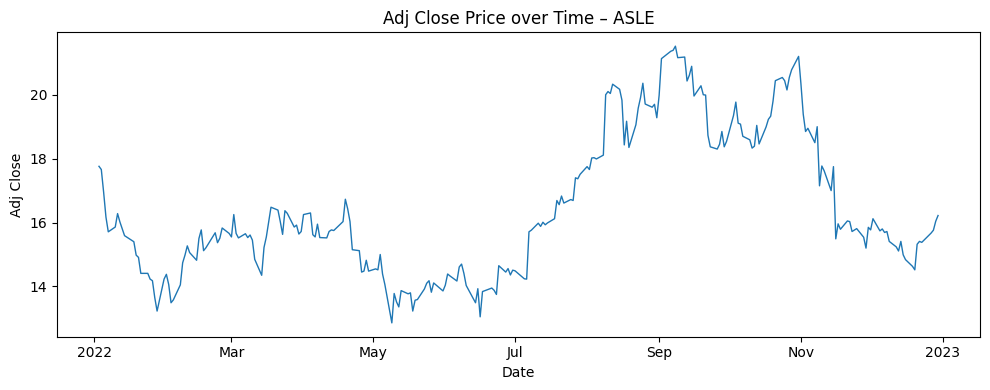

In [ ]:
import matplotlib.dates as mdates

if {'ticker', 'date', 'adjclose'}.issubset(df.columns):
    # Choose one ticker (you can change this string)
    sample_ticker = df['ticker'].iloc[0]   # first ticker in dataset
    print("Sample ticker:", sample_ticker)

    df_t = df[df['ticker'] == sample_ticker].copy()

    # Convert date for plotting
    df_t['date'] = pd.to_datetime(df_t['date'], errors='coerce')
    df_t = df_t.sort_values('date')

    plt.figure(figsize=(10, 4))
    plt.plot(df_t['date'], df_t['adjclose'], linewidth=1)
    plt.title(f'Adj Close Price over Time – {sample_ticker}')
    plt.xlabel('Date')
    plt.ylabel('Adj Close')

    # nicer date formatting (optional)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

    plt.tight_layout()
    plt.show()


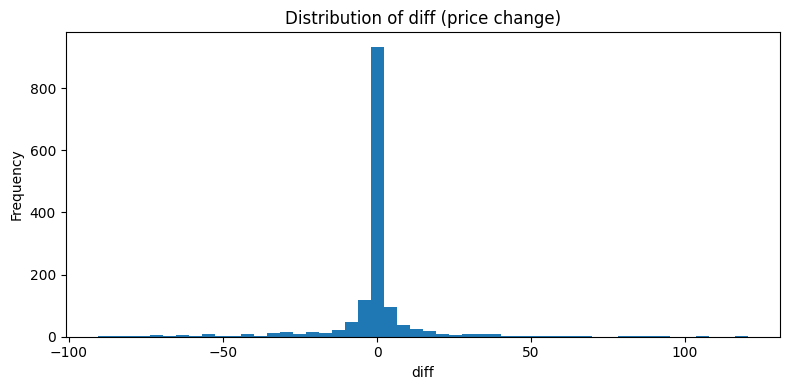

In [ ]:
# Histogram of raw price change
if 'diff' in df.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df['diff'].dropna(), bins=50)
    plt.title('Distribution of diff (price change)')
    plt.xlabel('diff')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()




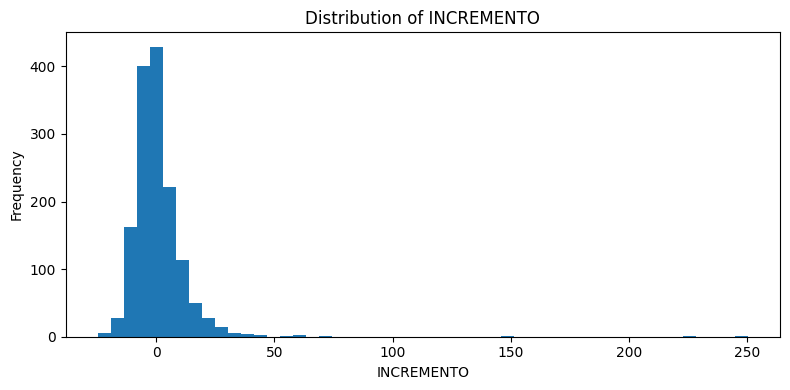

In [ ]:
# Histogram of increment
if 'INCREMENTO' in df.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df['INCREMENTO'].dropna(), bins=50)
    plt.title('Distribution of INCREMENTO')
    plt.xlabel('INCREMENTO')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [ ]:
if {'TARGET', 'diff', 'INCREMENTO'}.issubset(df.columns):
    print("\nMean diff and INCREMENTO by TARGET:")
    print(df.groupby('TARGET')[['diff', 'INCREMENTO']].mean())

    print("\nSummary by TARGET:")
    print(df.groupby('TARGET')[['diff', 'INCREMENTO']].describe())



Mean diff and INCREMENTO by TARGET:
             diff  INCREMENTO
TARGET                       
0.0     -4.192126   -3.565917
1.0     10.186724   14.671242

Summary by TARGET:
          diff                                                                 \
         count       mean        std        min       25%       50%       75%   
TARGET                                                                          
0.0     1118.0  -4.192126  13.503229 -90.538818 -2.207929 -0.285000  0.010000   
1.0      353.0  10.186724  19.943026   0.070000  0.400000  2.259674  8.290001   

                   INCREMENTO                                             \
               max      count       mean        std        min       25%   
TARGET                                                                     
0.0      28.771667     1118.0  -3.565917   4.947145 -24.673205 -6.784648   
1.0     120.256775      353.0  14.671242  20.457680   5.035966  7.361061   

                                    

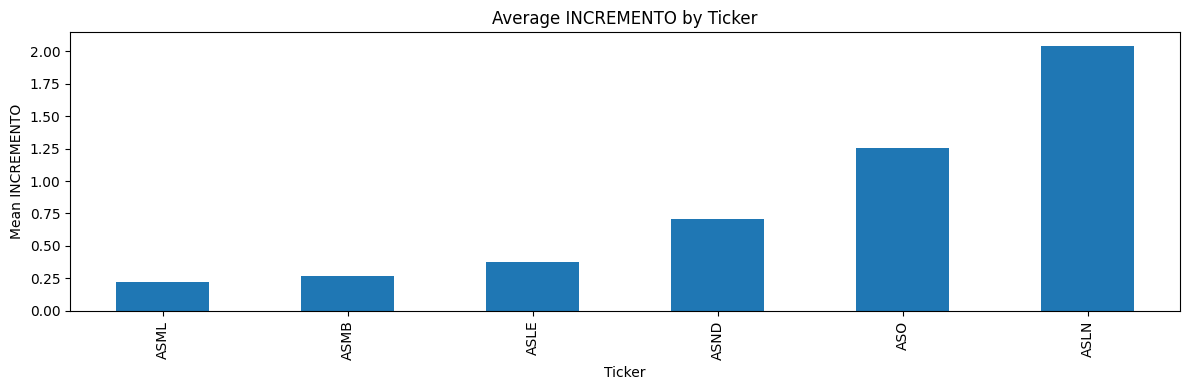

In [ ]:
if {'ticker', 'INCREMENTO'}.issubset(df.columns):
    avg_move = df.groupby('ticker')['INCREMENTO'].mean().sort_values()

    plt.figure(figsize=(12, 4))
    avg_move.plot(kind='bar')
    plt.title('Average INCREMENTO by Ticker')
    plt.xlabel('Ticker')
    plt.ylabel('Mean INCREMENTO')
    plt.tight_layout()
    plt.show()


In [ ]:
# Pick a few indicator columns IF they exist
candidate_cols = [
    'adjclose', 'volume',
    'smaadjclose5',
    'RSIadjclose15',
    'cci15',
    'diff', 'INCREMENTO'
]

cols = [c for c in candidate_cols if c in df.columns]

if len(cols) > 1:
    corr = df[cols].corr()
    print("\nCorrelation between selected features:")
    print(corr)



Correlation between selected features:
               adjclose    volume  smaadjclose5  RSIadjclose15     cci15  \
adjclose       1.000000  0.182384     -0.023432       0.021018 -0.025723   
volume         0.182384  1.000000     -0.075325       0.094374  0.065450   
smaadjclose5  -0.023432 -0.075325      1.000000      -0.557712 -0.678138   
RSIadjclose15  0.021018  0.094374     -0.557712       1.000000  0.793404   
cci15         -0.025723  0.065450     -0.678138       0.793404  1.000000   
diff          -0.156721  0.035016      0.005161      -0.054642 -0.033149   
INCREMENTO    -0.038535  0.041304     -0.036766      -0.011904  0.039199   

                   diff  INCREMENTO  
adjclose      -0.156721   -0.038535  
volume         0.035016    0.041304  
smaadjclose5   0.005161   -0.036766  
RSIadjclose15 -0.054642   -0.011904  
cci15         -0.033149    0.039199  
diff           1.000000    0.311809  
INCREMENTO     0.311809    1.000000  


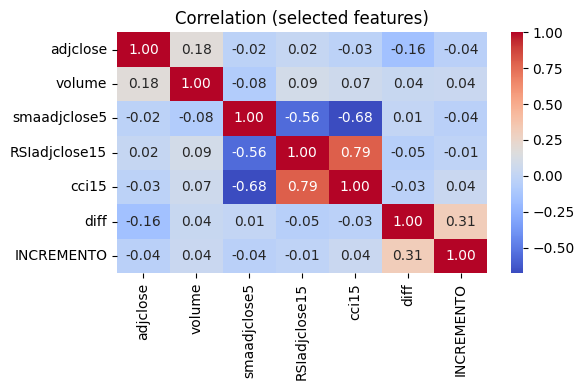

In [ ]:

import seaborn as sns

if len(cols) > 1:
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation (selected features)")
    plt.tight_layout()
    plt.show()


# **Preprocessed Dataset Insights**

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

RANDOM_STATE = 42
WINSOR_Q = (0.01, 0.99)  # clip predictors to 1st–99th pct (fit on train only)

In [2]:
# Train-only winsorizer (noise filter)
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, q_low=0.01, q_high=0.99):
        self.q_low, self.q_high = q_low, q_high
    def fit(self, X, y=None):
        X = np.asarray(X, float)
        self.lows_  = np.nanquantile(X, self.q_low, axis=0)
        self.highs_ = np.nanquantile(X, self.q_high, axis=0)
        return self
    def transform(self, X):
        X = np.asarray(X, float, copy=True)
        return np.minimum(np.maximum(X, self.lows_), self.highs_)

In [4]:
# 1) Load + light clean (keep original names)
df = pd.read_csv("infolimpioavanzadoTarget.csv").drop_duplicates()
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.sort_values(['ticker','date']) if 'ticker' in df.columns else df.sort_values('date')
if 'volumenrelativo' in df.columns:
    df['volumenrelativo'] = df['volumenrelativo'].replace([np.inf, -np.inf], np.nan)

In [5]:
# 2) Target = INCREMENTO (mild clipping to reduce tail noise)
if 'INCREMENTO' not in df.columns:
    raise ValueError("INCREMENTO not found in dataset.")
y = df['INCREMENTO'].replace([np.inf, -np.inf], np.nan)
mask = y.notna()
df, y = df.loc[mask].copy(), y.loc[mask].copy()
y = y.clip(y.quantile(0.01), y.quantile(0.99))  # noise control on label

In [6]:
print(y)

0     -9.664295
1     -7.247895
2     -5.201344
3     -2.177856
4     -0.758054
         ...   
128    1.481001
129    0.883847
130    5.374920
131    3.557563
132    5.988021
Name: INCREMENTO, Length: 133, dtype: float64


In [7]:
# 3) Features (original names; no renaming)
desired_numeric = [
    'open','high','low','adjclose','volume',
    'smaadjclose5','smaadjclose15','smaadjclose50',
    'RSIadjclose15','RSIadjclose25','RSIadjclose50',
    'RSIvolume15','RSIvolume25',
    'bollingerBU5-5adjclose','bollingerBL5-5adjclose',
    'atr5','atr15','vwapadjclosevolume','cci15','feargreed',
    'volumenrelativo'
]
if 'date' in df.columns:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['dayofweek'] = df['date'].dt.dayofweek
    desired_numeric += ['year','month','dayofweek']

num_cols = [c for c in desired_numeric if c in df.columns]
cat_cols = ['ticker'] if 'ticker' in df.columns else []

X = df[num_cols + cat_cols].copy()

In [8]:
# 4) Preprocessor (median → winsorize → scale; + one-hot for ticker)
numeric_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('winsor', Winsorizer(q_low=WINSOR_Q[0], q_high=WINSOR_Q[1])),
    ('scaler', StandardScaler())
])
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', numeric_pipe, num_cols),
    ('cat', categorical_pipe, cat_cols)
])

In [10]:
# 5) Time-aware split
if 'date' in df.columns:
    cut = df['date'].quantile(0.8)
    train_idx = df['date'] <= cut
    test_idx  = df['date']  > cut
else:
    train_idx, test_idx = train_test_split(np.arange(len(df)), test_size=0.2, random_state=RANDOM_STATE)
    train_idx, test_idx = pd.Index(train_idx), pd.Index(test_idx)

X_train, X_test = X.loc[train_idx], X.loc[test_idx]
y_train, y_test = y.loc[train_idx], y.loc[test_idx]


In [13]:
try:
    from sklearn.ensemble import HistGradientBoostingRegressor
except Exception:  # older sklearn needs this enable line
    from sklearn.experimental import enable_hist_gradient_boosting  # noqa: F401
    from sklearn.ensemble import HistGradientBoostingRegressor


In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, q_low=0.01, q_high=0.99):
        self.q_low = q_low
        self.q_high = q_high
    def fit(self, X, y=None):
        X = np.asarray(X, float)
        self.lows_  = np.nanquantile(X, self.q_low, axis=0)
        self.highs_ = np.nanquantile(X, self.q_high, axis=0)
        return self
    def transform(self, X):
        X = np.asarray(X, float, copy=True)
        return np.minimum(np.maximum(X, self.lows_), self.highs_)


In [16]:
# 6) Model: HistGradientBoosting (robust absolute-error loss)
hgb_abs = Pipeline([
    ('preprocess', preprocessor),
    ('model', HistGradientBoostingRegressor(
        loss='absolute_error',   # robust to fat tails
        max_depth=6,
        learning_rate=0.05,
        max_bins=255,
        l2_regularization=1e-2,
        early_stopping=True,
        random_state=RANDOM_STATE
    ))
])

hgb_abs.fit(X_train, y_train)
y_pred_tr = hgb_abs.predict(X_train)
y_pred_te = hgb_abs.predict(X_test)

def report(tag, yt, yp):
    mse = mean_squared_error(yt, yp); rmse = np.sqrt(mse)
    mae = mean_absolute_error(yt, yp); r2 = r2_score(yt, yp)
    print(f"{tag} -> RMSE:{rmse:.4f}  MAE:{mae:.4f}  R2:{r2:.4f}")

print("\n=== HistGradientBoostingRegressor (Absolute Error) on INCREMENTO ===")
report("Train", y_train, y_pred_tr)
report("Test ", y_test,  y_pred_te)



=== HistGradientBoostingRegressor (Absolute Error) on INCREMENTO ===
Train -> RMSE:3.3338  MAE:2.2378  R2:0.5814
Test  -> RMSE:6.4847  MAE:5.2609  R2:-0.1357


# **RandomForestRegressor**

In [17]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

RANDOM_STATE = 42
WINSOR_Q = (0.01, 0.99)

In [18]:
# Train-only winsorizer (noise filter for predictors)
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, q_low=0.01, q_high=0.99):
        self.q_low, self.q_high = q_low, q_high
    def fit(self, X, y=None):
        X = np.asarray(X, float)
        self.lows_  = np.nanquantile(X, self.q_low, axis=0)
        self.highs_ = np.nanquantile(X, self.q_high, axis=0)
        return self
    def transform(self, X):
        X = np.asarray(X, float, copy=True)
        return np.minimum(np.maximum(X, self.lows_), self.highs_)

In [19]:
# 1) Load + light clean (original names kept)
df = pd.read_csv("infolimpioavanzadoTarget.csv").drop_duplicates()
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.sort_values(['ticker','date']) if 'ticker' in df.columns else df.sort_values('date')
if 'volumenrelativo' in df.columns:
    df['volumenrelativo'] = df['volumenrelativo'].replace([np.inf, -np.inf], np.nan)


In [20]:
# 2) Target = INCREMENTO (mild clipping to tame tails)
if 'INCREMENTO' not in df.columns:
    raise ValueError("INCREMENTO not found in dataset.")
y = df['INCREMENTO'].replace([np.inf, -np.inf], np.nan)
mask = y.notna()
df, y = df.loc[mask].copy(), y.loc[mask].copy()
y = y.clip(y.quantile(0.01), y.quantile(0.99))

In [29]:
# 3) Features (original names)
desired_numeric = [
    'open','high','low','adjclose','volume',
    'smaadjclose5','smaadjclose15','smaadjclose50',
    'RSIadjclose15','RSIadjclose25','RSIadjclose50',
    'RSIvolume15','RSIvolume25',
    'bollingerBU5-5adjclose','bollingerBL5-5adjclose',
    'atr5','atr15','vwapadjclosevolume','cci15','feargreed',
    'volumenrelativo'
]

In [30]:
if 'date' in df.columns:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['dayofweek'] = df['date'].dt.dayofweek
    desired_numeric += ['year','month','dayofweek']

num_cols = [c for c in desired_numeric if c in df.columns]
cat_cols = ['ticker'] if 'ticker' in df.columns else []
X = df[num_cols + cat_cols].copy()

In [31]:
numeric_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('winsor', Winsorizer(q_low=WINSOR_Q[0], q_high=WINSOR_Q[1])),
    ('scaler', StandardScaler())
])
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', numeric_pipe, num_cols),
    ('cat', categorical_pipe, cat_cols)
])

In [32]:
# 5) Time-aware split (last 20% by date as test if available)
if 'date' in df.columns:
    cut = df['date'].quantile(0.8)
    train_idx = df['date'] <= cut
    test_idx  = df['date']  > cut
else:
    train_idx, test_idx = train_test_split(np.arange(len(df)), test_size=0.2, random_state=RANDOM_STATE)
    train_idx, test_idx = pd.Index(train_idx), pd.Index(test_idx)

X_train, X_test = X.loc[train_idx], X.loc[test_idx]
y_train, y_test = y.loc[train_idx], y.loc[test_idx]

In [33]:
# 6) Model: RandomForestRegressor
rf = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=600,
        max_depth=None,          # try 8–20 if you see overfit
        min_samples_leaf=5,      # adds smoothing; increase to 10 for more
        max_features='sqrt',     # good default for tabular
        bootstrap=True,
        n_jobs=-1,
        random_state=RANDOM_STATE
    ))
])

rf.fit(X_train, y_train)
y_pred_tr = rf.predict(X_train)
y_pred_te = rf.predict(X_test)

def report(tag, yt, yp):
    mse = mean_squared_error(yt, yp); rmse = np.sqrt(mse)
    mae = mean_absolute_error(yt, yp); r2 = r2_score(yt, yp)
    print(f"{tag} -> RMSE:{rmse:.4f}  MAE:{mae:.4f}  R2:{r2:.4f}")

print("\n=== RandomForestRegressor on INCREMENTO ===")
report("Train", y_train, y_pred_tr)
report("Test ", y_test,  y_pred_te)


=== RandomForestRegressor on INCREMENTO ===
Train -> RMSE:4.9707  MAE:3.2850  R2:0.6540
Test  -> RMSE:8.8968  MAE:6.1419  R2:-0.0678
